# Import Dependencies

In [2]:
import gym
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_util import make_atari_env
import os

**So we install `gym` for making the environment,then we import the `A2C` which is the algorithm which we will be using in this notebook to train our agent on the environment created by `gym`,then we have the `VecFrameStack` which is used for vectorising and for making our agent train on multiple environments of similar kind at once,then we have the evaluate ploicy,which is used to evaluate our model performance!,note that it not the same as testing,initially our agent will be taking some random steps,because the agent has not been trained right!,but then we introduce to some policies to our agent,like the `MlpPolicy,CNNPolicy`,which are neural networks within,so the agent will learn from these steps and then give out some kind of predictions,so we evaluate those predictions on the environment using the `evaluate_policy` and then for making the environment we use the `make_atari_env` library,os is used for navigation,saving our models and loading models and other stuff related to navigating between the files!**

## Setting up The Environment

**There were a couple of changes in the `atari` environments,so they hav e made few changes in them,and made the repository public,so if we wanna use the `atari` environments,then there are few files which we must be requiring,they're the Rom files,so for that you can head over to this <a href = "https://github.com/openai/atari-py#roms" target = "_blank">Repository</a>,so follow the steps,uptil extracting the ROM files then one last step is to just install them right here by running the below code `!python -m atari_py.import_roms .\ROMS`,note that the `ROMS` file must be present in the same location!**

In [ ]:
# !python -m atari_py.import_roms .\ROMS

# Test Environment

In [9]:
env_name = "Breakout-v0"
env = gym.make(env_name)

In [15]:
## lets have a look at the action space and the observation space

print(env.action_space)

## observation space 

print(env.observation_space)

Discrete(4)
Box(0, 255, (210, 160, 3), uint8)


**So as we can see the `Action Space` is a `Discrete(4)`,that means there are 4 different values,which are probably {1,2,3,4},indicating the directions,in which the attari agent must go inorder to destroy the colorblocks which are available ahead of it,here is a small demostration of the `Environment` and the `Agent` in the environment**

**The 4 in the Discrete indicate that the agent can take 4 different actions,and the `(210,160,3)`these indicate the dimenssion of an image which is of `RGB` color coz of `3` which indicate the number of channels,and the `210,160` indicate the `width and height` of the image,so this is gonna be an image based model which we will be training on!,here is the sample of it ↓**

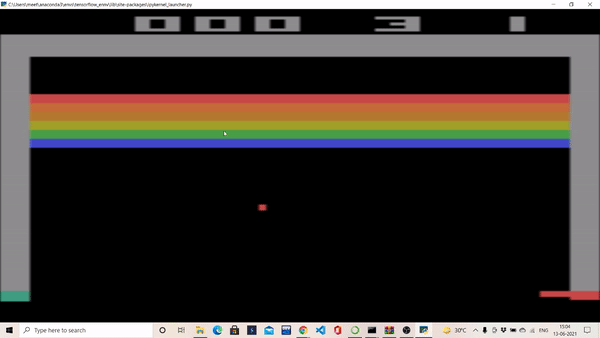

In [19]:
# The above gif is the output of this particular code given below ↓

episodes = 10
for episode in range(1,episodes+1):
    state = env.reset()
    done = False
    score = 0
    while not done:
        env.render()
        action = env.action_space.sample()
        n_state,reward,done,info = env.step(action)
        score+=reward
       
    print(f'Episode is : {episode},score is : {score}')
        
env.close()

Episode is : 1,score is : 0.0
Episode is : 2,score is : 0.0
Episode is : 3,score is : 0.0
Episode is : 4,score is : 1.0
Episode is : 5,score is : 0.0
Episode is : 6,score is : 2.0
Episode is : 7,score is : 0.0
Episode is : 8,score is : 3.0
Episode is : 9,score is : 0.0
Episode is : 10,score is : 0.0


# Vectorise Environment and Train Model

**So we'll be setting the `atari environment`for the `Breakout-v0` where we will be passing 4 kinds of environments where the model will be training,and gonna set the seed = 0,meaning that we get the reproducable output,i mean smiliar kind of results,and then after we stack our 4 environments such that the agent will perform it's task one after one as how and now the environments come in!,then we set the log path and the set the `A2C` algorithm here we will be using the `CnnPolicy` to train our agent as the environment is related to the images!,as the observations in this case is an image we'll be using the `CNNPolicy`in this case!,if we want a very high performing model,then we can train this model for very long period of timesteps something around `100000 or more` for getting a perfect robust model!**

In [6]:
env = make_atari_env('Breakout-v0',n_envs=4,seed=0)
env = VecFrameStack(env,n_stack=4)
log_path = os.path.join('Training','Logs')
model = A2C("CnnPolicy",env,verbose=1,tensorboard_log=log_path)
model.learn(total_timesteps = 100000)

Using cpu device
Wrapping the env in a VecTransposeImage.


# Save and Reload Model

In [4]:
a2c_path = os.path.join('Training','Saved Models','A2C_model')
a2c_path

'Training\\Saved Models\\A2C_model'

In [39]:
a2c_path = os.path.join('Training','Saved Models','A2C_model')
model.save(a2c_path)

In [7]:
# Deleting the current model,as i have saved the model,so i'll delete 
# this one and reload the model,just to check whether its getting loaded
# correctly or not

model = A2C.load(a2c_path,env = env)

Wrapping the env in a VecTransposeImage.


In [ ]:
model = A2

# Evaluate and Test Model

**So here we have to be careful,as when we created our environment,we created a stack of 4 environments right!,but we can evaluate policy on one environment at a time only,so let me make this evv[1] or any index you desire from {1,2,3,4}**

In [8]:
## creating a single environment,so this time instead of stacking 
## four different environments,i have stacked the same environment for 
## 4 times!

env = make_atari_env('Breakout-v0',n_envs=1,seed=0)
env = VecFrameStack(env,n_stack=4)

In [13]:
evaluate_policy(model,env,n_eval_episodes=10,render=True)
env.close()

In [12]:
episodes = 50
for episode in range(1,episodes+1):
    obs = env.reset()
    score = 0
    done = False
    while not done:
        env.render()
        actions,_ = model.predict(obs)
        obs,reward,done,info  = env.step(actions)
        score+=reward
        
    print(f'Episode is :{episode},Score is :{score}')
    
env.close()

Episode is :1,Score is :[0.]
Episode is :2,Score is :[0.]
Episode is :3,Score is :[4.]
Episode is :4,Score is :[3.]
Episode is :5,Score is :[0.]
Episode is :6,Score is :[0.]
Episode is :7,Score is :[0.]
Episode is :8,Score is :[0.]
Episode is :9,Score is :[0.]
Episode is :10,Score is :[4.]
Episode is :11,Score is :[4.]
Episode is :12,Score is :[0.]
Episode is :13,Score is :[0.]
Episode is :14,Score is :[1.]
Episode is :15,Score is :[1.]
Episode is :16,Score is :[0.]
Episode is :17,Score is :[0.]
Episode is :18,Score is :[1.]
Episode is :19,Score is :[0.]
Episode is :20,Score is :[5.]
Episode is :21,Score is :[0.]
Episode is :22,Score is :[4.]
Episode is :23,Score is :[5.]
Episode is :24,Score is :[0.]
Episode is :25,Score is :[2.]
Episode is :26,Score is :[0.]
Episode is :27,Score is :[0.]
Episode is :28,Score is :[0.]
Episode is :29,Score is :[0.]
Episode is :30,Score is :[1.]
Episode is :31,Score is :[4.]
Episode is :32,Score is :[0.]
Episode is :33,Score is :[2.]
Episode is :34,Scor

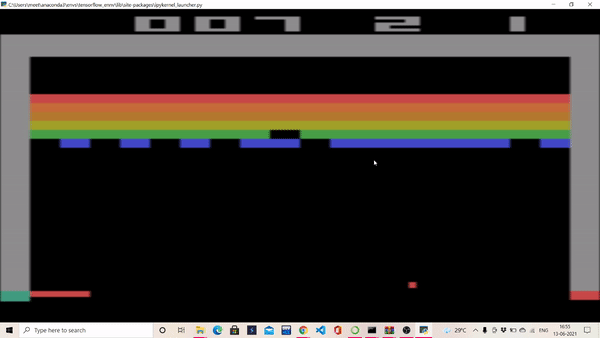

**The Model was trained for 100000 eval steps and seems like model has undergone a good training,as the agent is able to destroy all the color plates as we can see from the above ↑ img,we'll for more ribust performance one can train the model for even more iterations!**